In [2]:
import pandas as pd

# 读取 xlsx 文件，假设文件名为 "data.csv"
df = pd.read_excel(r'..\数据可视化\上海市餐饮行业 - 副本.xlsx')

# 查看数据框的前几行，检查数据格式
print(df.head())




    口味   环境   服务  人均消费  行政区  食品类别
0  150  150  150   150  150   150
1  123  144  144   144  144   144
2  162  122  162   162  162   162
3  129  129  129   129  129   129
4  143  143  143   143  143   143


In [3]:
# 查看数据框的描述信息，包括统计描述和数据类型
print(df.describe())
print('/')
print(df.info())

               口味          环境          服务      人均消费         行政区       食品类别
count   20.000000   20.000000   20.000000   20.0000   20.000000   20.00000
mean   146.950000  141.300000  150.500000  143.9000  149.000000  145.40000
std     14.999912   16.358162   21.893282   18.0114   12.871838   14.93988
min    123.000000  115.000000  123.000000   99.0000  123.000000  119.00000
25%    136.500000  126.500000  142.000000  136.5000  143.750000  135.75000
50%    149.000000  144.500000  148.500000  147.0000  149.000000  147.00000
75%    157.250000  150.500000  156.500000  155.2500  157.250000  155.25000
max    175.000000  175.000000  223.000000  175.0000  175.000000  175.00000
/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   口味      20 non-null     int64
 1   环境      20 non-null     int64
 2   服务      20 non-null     int64
 3   人均消费    20 non-null     int64
 4   行政区   

In [4]:
# 删除全为空值的特征列
df.dropna(axis=1, how='all', inplace=True)

# 检查记录中是否存在缺失值，并显示缺失值的总数
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



Series([], dtype: int64)


In [5]:
# 删除包含缺失值的记录
df.dropna(inplace=True)

# 检查数据框中是否存在无意义的重复值并删除
df.drop_duplicates(inplace=True)

# 再次查看数据框的描述信息，确保数据清理后的结果
print(df.describe())
print('/')
print(df.info())

               口味          环境          服务      人均消费         行政区       食品类别
count   20.000000   20.000000   20.000000   20.0000   20.000000   20.00000
mean   146.950000  141.300000  150.500000  143.9000  149.000000  145.40000
std     14.999912   16.358162   21.893282   18.0114   12.871838   14.93988
min    123.000000  115.000000  123.000000   99.0000  123.000000  119.00000
25%    136.500000  126.500000  142.000000  136.5000  143.750000  135.75000
50%    149.000000  144.500000  148.500000  147.0000  149.000000  147.00000
75%    157.250000  150.500000  156.500000  155.2500  157.250000  155.25000
max    175.000000  175.000000  223.000000  175.0000  175.000000  175.00000
/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   口味      20 non-null     int64
 1   环境      20 non-null     int64
 2   服务      20 non-null     int64
 3   人均消费    20 non-null     int64
 4   行政区   

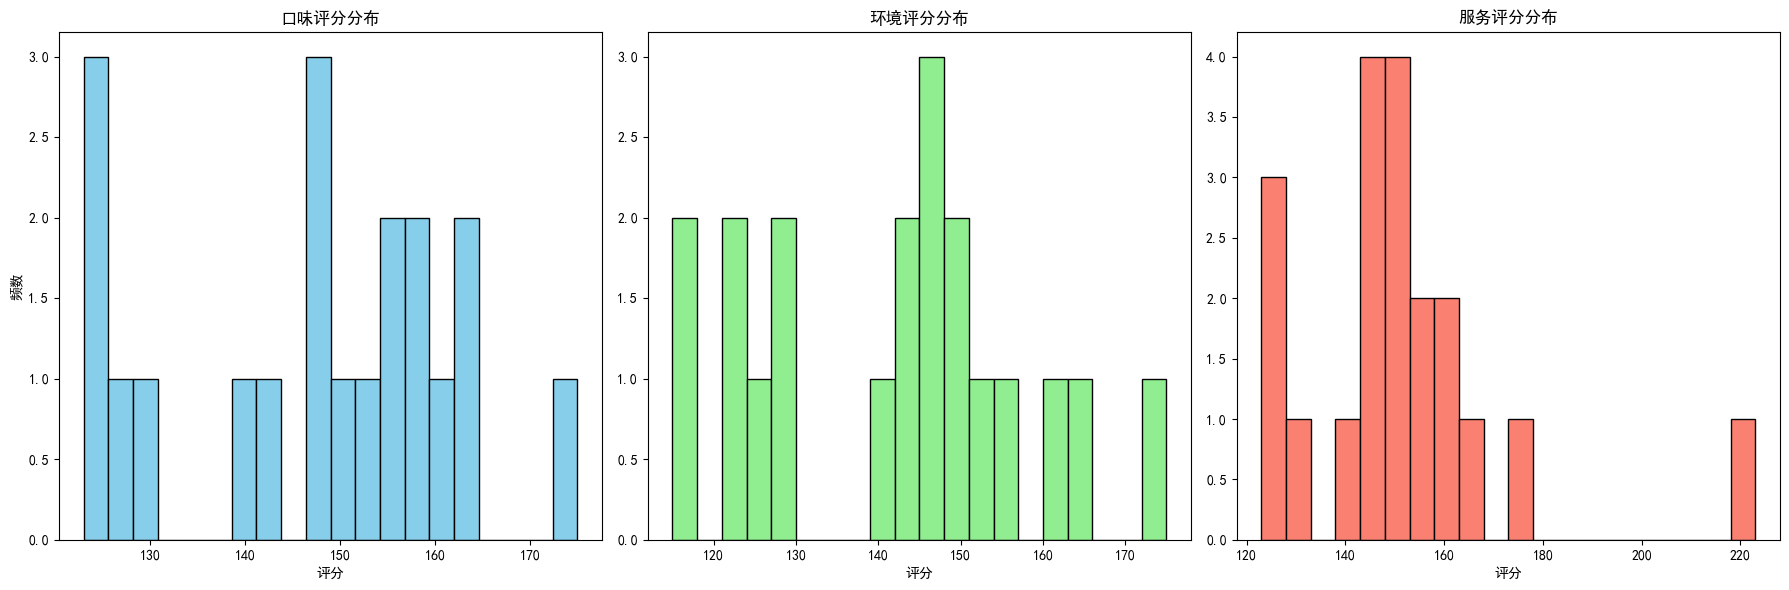

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False
# 绘制“口味”、“环境”、“服务”评分字段的直方图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 口味评分直方图
axes[0].hist(df['口味'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('口味评分分布')
axes[0].set_xlabel('评分')
axes[0].set_ylabel('频数')

# 环境评分直方图
axes[1].hist(df['环境'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('环境评分分布')
axes[1].set_xlabel('评分')

# 服务评分直方图
axes[2].hist(df['服务'], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('服务评分分布')
axes[2].set_xlabel('评分')

plt.tight_layout()
plt.show()


In [45]:
from pyecharts.charts import Scatter
from pyecharts import options as opts

# 创建一个Scatter实例
scatter = Scatter()

# 添加X轴数据
scatter.add_xaxis([10, 1, 5])

# 添加Y轴数据并设置系列名称
scatter.add_yaxis('1', [150, 123])

# 设置图表的全局选项
scatter.set_global_opts(title_opts=opts.TitleOpts(title="散点图示例"))

# 在Jupyter Notebook中渲染图表
scatter.render_notebook()


In [48]:
from pyecharts.charts import Scatter, Line
from pyecharts import options as opts
print(df.columns)  # 打印所有列名
print(df.index)    # 打印所有索引

print(df['人均消费'].tolist())
print(df['口味'].tolist())
# 绘制散点图
scatter = Scatter()
# scatter.add_yaxis("Series Name", [d[1] for d in df], symbol_size=10)
scatter.add_xaxis(list(range(len(df['人均消费'].tolist()) + 1)))
scatter.add_yaxis("口味", df['口味'].tolist())
scatter.add_yaxis("环境", df['环境'].tolist())
scatter.add_yaxis("服务", df['服务'].tolist())
scatter.set_global_opts(title_opts=opts.TitleOpts(title="评分与人均消费的散点图"))

# 绘制折线图
line = Line()
line.add_xaxis(list(range(len(df['人均消费'].tolist()) + 1)))
line.add_yaxis("口味", df['口味'].tolist())
line.add_yaxis("环境", df['环境'].tolist())
line.add_yaxis("服务", df['服务'].tolist())
line.set_global_opts(title_opts=opts.TitleOpts(title="评分与人均消费的折线图"))

# 渲染图表
scatter.render_notebook()
# line.render_notebook()


Index(['口味', '环境', '服务', '人均消费', '行政区', '食品类别'], dtype='object')
RangeIndex(start=0, stop=20, step=1)
[150, 144, 162, 129, 143, 152, 175, 160, 148, 125, 155, 123, 147, 139, 145, 116, 163, 156, 99, 147]
[150, 123, 162, 129, 143, 152, 175, 160, 148, 125, 155, 123, 147, 139, 157, 158, 163, 156, 127, 147]


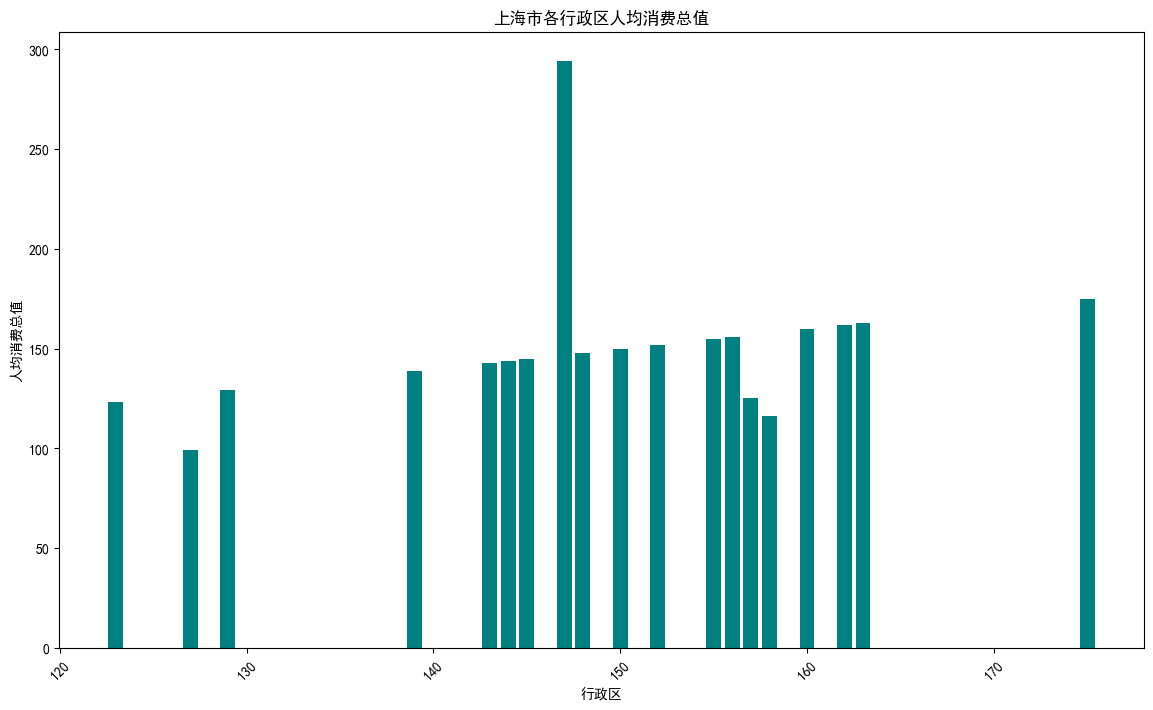

In [ ]:
# 假设数据框中有一个列 '行政区' 和 '人均消费'
# 分组计算每个行政区的人均消费总值
district_avg_spending = df.groupby('行政区')['人均消费'].sum().reset_index()

# 按人均消费总值降序排序
district_avg_spending = district_avg_spending.sort_values(by='人均消费', ascending=False)

# 绘制条形图
plt.figure(figsize=(14, 8))
plt.bar(district_avg_spending['行政区'], district_avg_spending['人均消费'], color='teal')
plt.title('上海市各行政区人均消费总值')
plt.xlabel('行政区')
plt.ylabel('人均消费总值')
plt.xticks(rotation=45)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10816\832244554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='食品类别', data=df, palette='viridis')


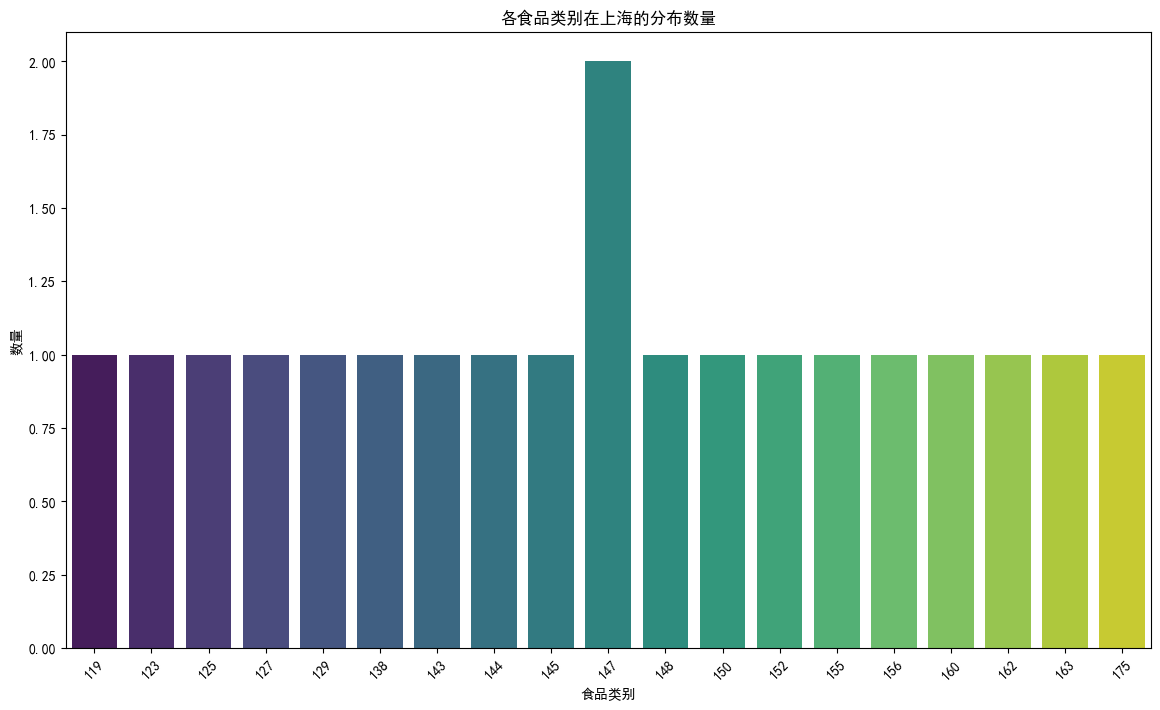

In [ ]:
# 假设数据框中有一个列 '食品类别'
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.countplot(x='食品类别', data=df, palette='viridis')
plt.title('各食品类别在上海的分布数量')
plt.xlabel('食品类别')
plt.ylabel('数量')
plt.xticks(rotation=45)
plt.show()
